In [73]:
import plotly.express as px
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [101]:
def scale_df(df):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df))
    df_scaled.columns = df.columns
    df_scaled.index = df.index
    return df_scaled, scaler

In [100]:
def transform_df(scaler, df):
    df_scaled = pd.DataFrame(scaler.transform(df))
    df_scaled.columns = df.columns
    df_scaled.index = df.index
    return df_scaled

In [112]:
merged_tube = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/TUBE_merge_1.csv'),
                  index_col=0)
merged_pipe = pipe = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/PIPE_merge_1.csv'),
                  index_col=0)

merged_tube = merged_tube.drop(columns=['Absorption_avg_500','Absorption_std_500','Absorption_avg_200','Absorption_std_200'])
merged_pipe = merged_pipe.drop(columns=['Absorption_avg_100','Absorption_std_100'])


In [107]:
data_tube = merged_tube[["TEP_mean_uV_C","backscatter_avg","Absorption_avg_50","A","B","p","median_CF","median_perm","median_MBN"]]
merged_tube_errors = merged_tube[["TEP_error_uV_C","backscatter_std","Absorption_std_50","A std","B std","p std"]]
for col in "cf_std","mbn_std","perm_std":
    merged_tube_errors[col] = 0

data_tube_min_boundary = data_tube - merged_tube_errors.values
data_tube_max_boundary = data_tube + merged_tube_errors.values

scaled_tube, scaler = scale_df(data_tube)
scaled_tube_min_boundary = transform_df(scaler, data_tube_min_boundary)
scaled_tube_max_boundary = transform_df(scaler, data_tube_max_boundary)
scaled_tube['condition'] = scaled_tube.index
scaled_tube_min_boundary['condition'] = scaled_tube.index
scaled_tube_max_boundary['condition'] = scaled_tube.index


/home/nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
data_tube

,TEP_mean_uV_C,backscatter_avg,Absorption_avg_50,A,B,p,median_CF,median_perm,median_MBN
T_B1,12.947951,0.0175,0.001264,4.410000e-13,0.000875,0.219,1.1000,68.50,0.4730
T_B2,12.920068,0.0240,0.002486,1.520000e-06,0.002010,0.273,1.1095,66.45,0.6305
T_B3,12.932865,0.0134,0.001168,4.270000e-13,0.000799,0.218,1.0795,68.40,0.5765
T_B4,10.763517,0.0146,0.002084,7.580000e-07,0.001210,0.299,4.5140,32.90,0.5005
T_B5,12.942958,0.0182,0.001141,3.970000e-13,0.000890,0.245,1.4290,64.95,0.5380
T_B6,11.037827,0.0148,0.001323,1.350000e-12,0.000541,0.209,4.6720,34.05,0.3010
T_B7,12.882150,0.0300,0.001908,4.820000e-13,0.002440,0.495,0.6580,103.55,0.6075
T_B8,12.257788,0.0269,0.000933,4.420000e-12,0.000972,0.247,2.0400,57.80,0.3745
T_AR,12.947031,0.0179,0.001257,4.430000e-13,0.000851,0.203,1.2355,61.85,0.5940
T_N,10.805126,0.0253,0.003128,1.440000e-07,0.001480,0.288,4.4960,33.40,0.5915


Text(0.5, 1.0, 'Tubes')

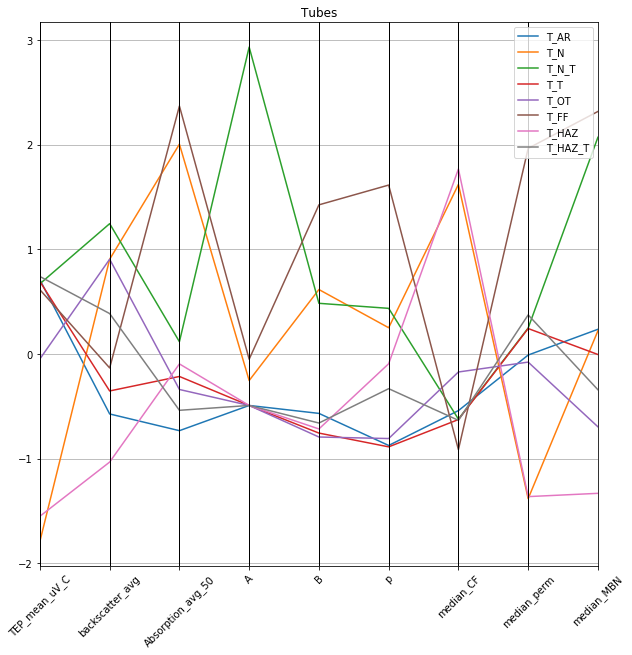

In [130]:
#fig = px.parallel_coordinates(scaled_tube.iloc[8:16,],color="condition")
#plt.clf()
plt.figure(figsize=(10,10))
parallel_coordinates(scaled_tube.iloc[8:16,],class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
#parallel_coordinates(scaled_tube_max_boundary.iloc[8:16,],class_column="condition", alpha=.2,color=matplotlib.colors.TABLEAU_COLORS)
#parallel_coordinates(scaled_tube_min_boundary.iloc[8:16,],class_column="condition", alpha=.2,color=matplotlib.colors.TABLEAU_COLORS)
plt.xticks(rotation=45)
plt.title("Tubes")
#fig.show()

Text(0.5, 1.0, 'Tubes')

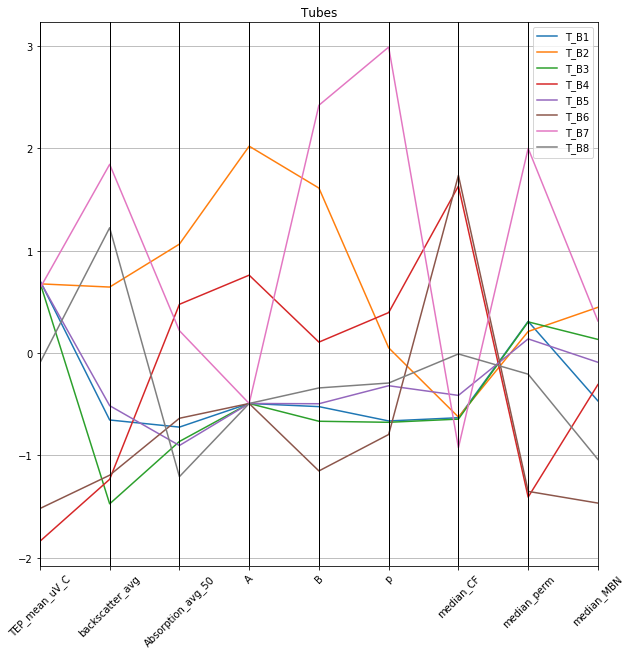

In [115]:

plt.figure(figsize=(10,10))
parallel_coordinates(scaled_tube.iloc[:8,],class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
plt.xticks(rotation=45)
plt.title("Tubes")
